# Случайный лес

Случайный лес / Random Forest — это алгоритм машинного обучения, который использует комбинацию множества деревьев принятия решений для выполнения задач классификации и регрессии. Он является одним из самых мощных и универсальных алгоритмов в машинном обучении благодаря своей способности к высокой точности и устойчивости к переобучению.

## Блок с используемыми библиотеками

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Блок с описанием и демонстрацией (частичной распечаткой) используемого датасета

In [2]:
data = pd.read_csv('./input/Iris.csv')
speciesTypes = data['Species'].unique()
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

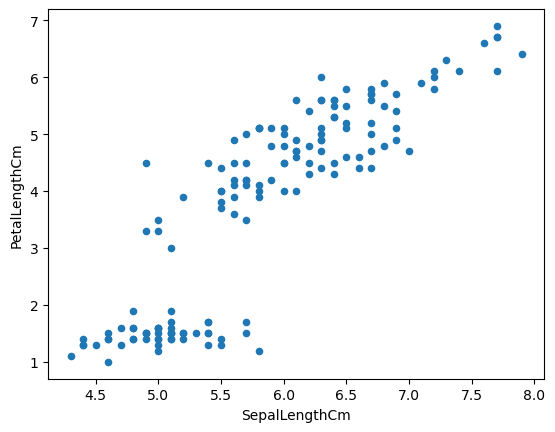

In [5]:
#Длина чашелистика vs длина лепестка
data.plot(x = 'SepalLengthCm', y = 'PetalLengthCm', kind = 'scatter')

## Блок с предварительной обработкой датасета

In [6]:
data = data.drop('Id', axis = 1)

In [7]:
species_mapping = {species: idx for idx, species in enumerate(data['Species'].unique())}
data['Species'] = data['Species'].map(species_mapping)
y = data[['Species']].copy()
data = data.drop('Species', axis = 1)

In [8]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Блок с тепловой картой

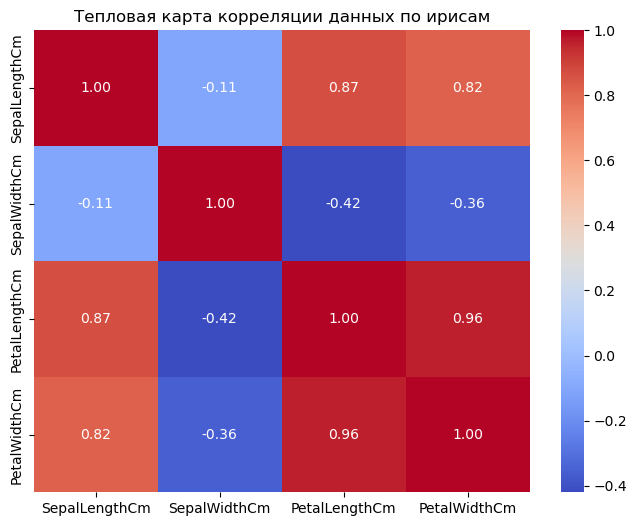

In [10]:
corr = data.corr()

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции данных по ирисам')
plt.show()

## Блок с обучением модели

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y.values.ravel(), test_size=0.2, random_state=54)

# Создаем классификатор случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=54, max_depth=2)  # Указываем количество деревьев (n_estimators)

# Обучаем модель на обучающем наборе
clf.fit(X_train.iloc[:, [0, 1]], y_train) 

RandomForestClassifier(max_depth=2, random_state=54)

## Блок с прогнозами модели

In [12]:
# Делаем предсказания на тестовом наборе
y_pred = clf.predict(X_test.iloc[:, [0, 1]])

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision:", precision)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall:", recall)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')
auc_roc = roc_auc_score(y_test, clf.predict_proba(X_test.iloc[:, [0, 1]]), multi_class='ovr')
print(f'AUC-ROC: {auc_roc}')

Точность: 0.6666666666666666
Precision: 0.6969696969696969
Recall: 0.6969696969696969
F1 Score: 0.6969696969696969
AUC-ROC: 0.8851674641148325


In [13]:
y_pred

array([0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 1, 2, 0, 2, 2], dtype=int64)

In [14]:
y_test

array([0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 0, 1, 1], dtype=int64)

## Блок с графиками выходных результатов

In [15]:
plt.show()

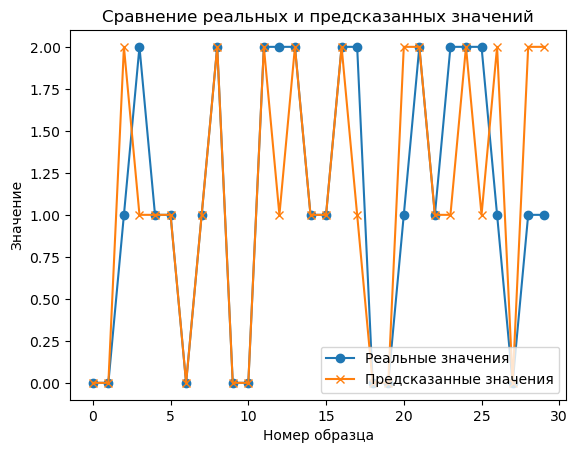

In [16]:
plt.figure()
plt.plot(y_test, label='Реальные значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения', marker='x')
plt.xlabel('Номер образца')
plt.ylabel('Значение')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()